# Declaration of Originality

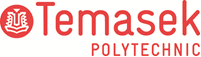

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay
)

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import joblib

RANDOM_STATE = 42
FILE_PATH = "ecommerce_customer_churn_dataset.csv"
TARGET = "Churned"


# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv(FILE_PATH)
print("Shape:", df.shape)
df.head()


Shape: (50000, 25)


,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
df.shape, df.columns


((50000, 25),
 Index(['Age', 'Gender', 'Country', 'City', 'Membership_Years',
        'Login_Frequency', 'Session_Duration_Avg', 'Pages_Per_Session',
        'Cart_Abandonment_Rate', 'Wishlist_Items', 'Total_Purchases',
        'Average_Order_Value', 'Days_Since_Last_Purchase',
        'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate',
        'Customer_Service_Calls', 'Product_Reviews_Written',
        'Social_Media_Engagement_Score', 'Mobile_App_Usage',
        'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
        'Churned', 'Signup_Quarter'],
       dtype='object'))

In [4]:
df.dtypes


Age                              float64
Gender                            object
Country                           object
City                              object
Membership_Years                 float64
Login_Frequency                  float64
Session_Duration_Avg             float64
Pages_Per_Session                float64
Cart_Abandonment_Rate            float64
Wishlist_Items                   float64
Total_Purchases                  float64
Average_Order_Value              float64
Days_Since_Last_Purchase         float64
Discount_Usage_Rate              float64
Returns_Rate                     float64
Email_Open_Rate                  float64
Customer_Service_Calls           float64
Product_Reviews_Written          float64
Social_Media_Engagement_Score    float64
Mobile_App_Usage                 float64
Payment_Method_Diversity         float64
Lifetime_Value                   float64
Credit_Balance                   float64
Churned                            int64
Signup_Quarter  

In [5]:
print("Target counts:")
print(df[TARGET].value_counts())
print("Churn rate (%):", round(df[TARGET].mean() * 100, 2))


Target counts:
Churned
0    35550
1    14450
Name: count, dtype: int64
Churn rate (%): 28.9


In [6]:
## Check for missing data
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)

missing_summary = pd.DataFrame({
    "missing_count": missing_count,
    "missing_percent(%)": missing_percent
})

missing_summary[missing_summary["missing_count"] > 0]


,missing_count,missing_percent(%)
Social_Media_Engagement_Score,6000,12.000
Credit_Balance,5500,11.000
Mobile_App_Usage,5000,10.000
Returns_Rate,4491,8.982
Wishlist_Items,4000,8.000
Discount_Usage_Rate,3500,7.000
Product_Reviews_Written,3500,7.000
Session_Duration_Avg,3399,6.798
Days_Since_Last_Purchase,3000,6.000
Pages_Per_Session,3000,6.000


In [ ]:
## Describe data distribution


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

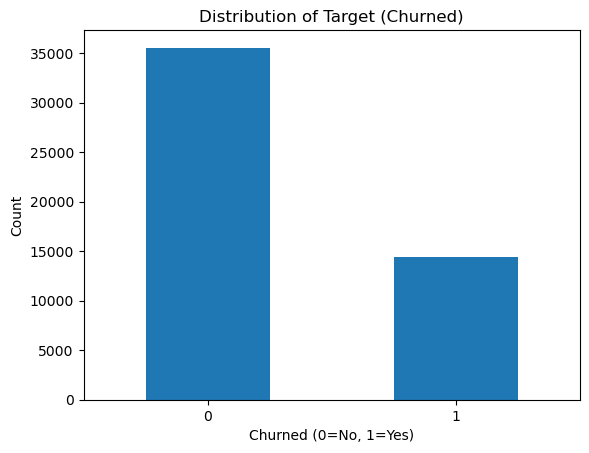

In [7]:
## Understanding distribution of target
plt.figure()
df[TARGET].value_counts().plot(kind="bar")
plt.title("Distribution of Target (Churned)")
plt.xlabel("Churned (0=No, 1=Yes)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [8]:
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)

num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

print("Numeric cols:", len(num_cols))
print("Categorical cols:", len(cat_cols))


Numeric cols: 20
Categorical cols: 4


### 2.3.1.2 Understanding distribution of features

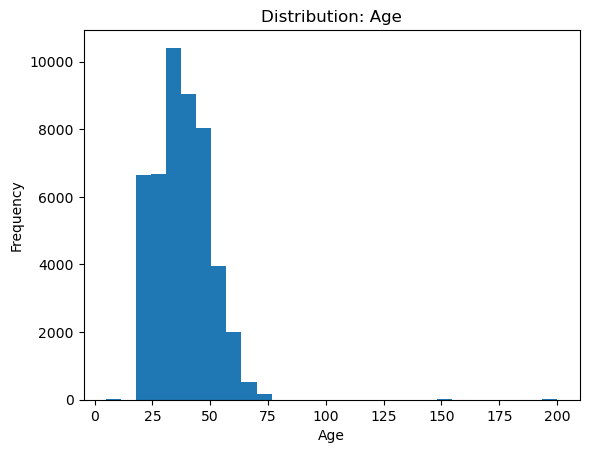

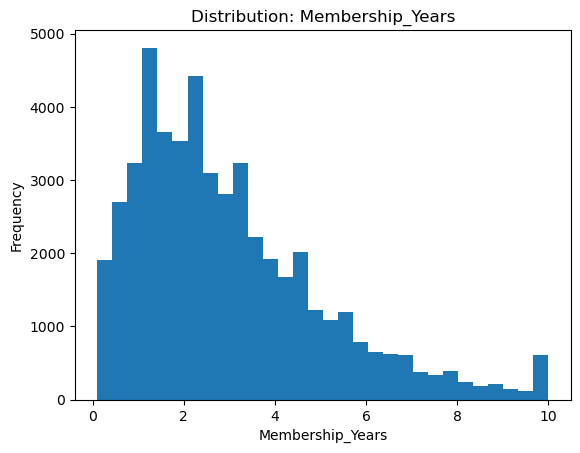

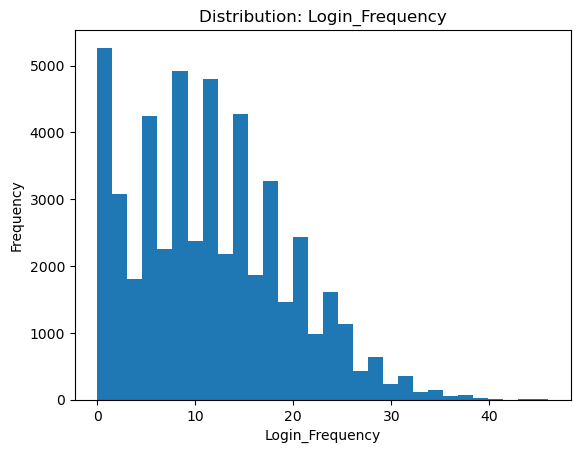

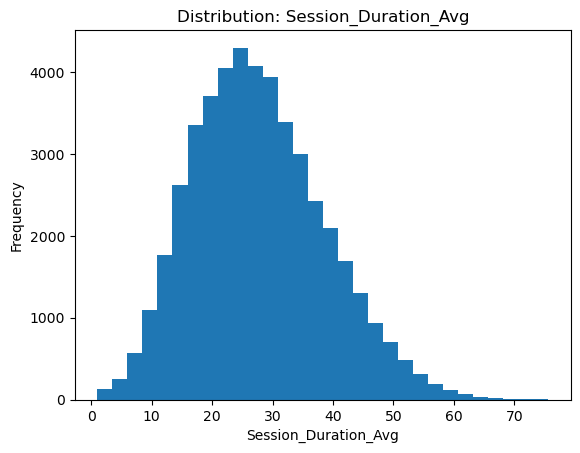

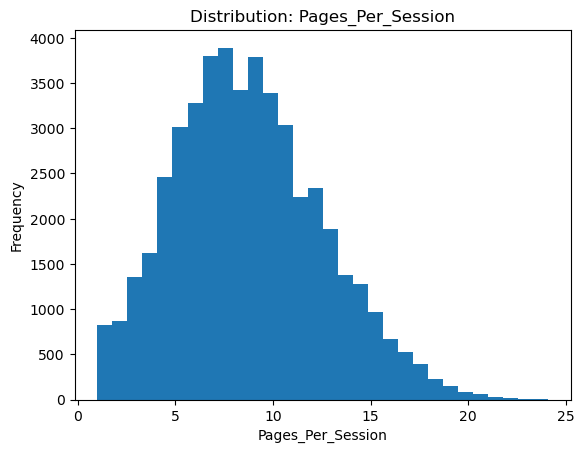

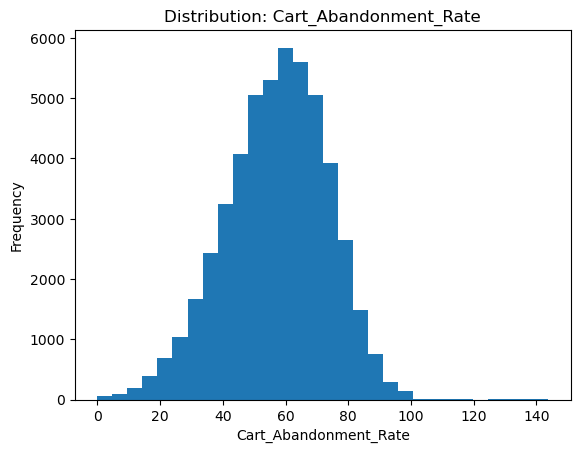

In [9]:
## Understanding distribution of features
for col in num_cols[:6]:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


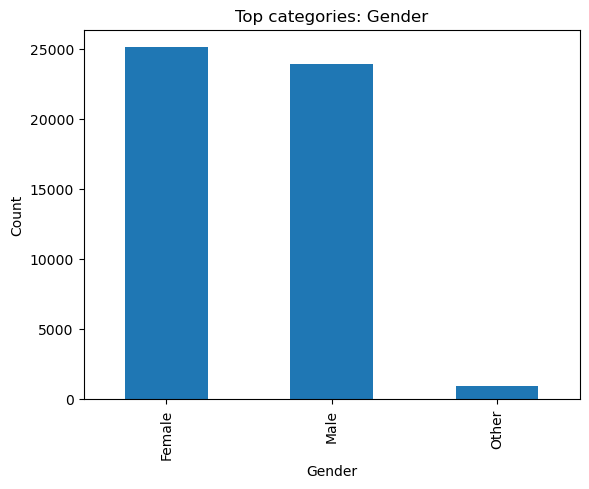

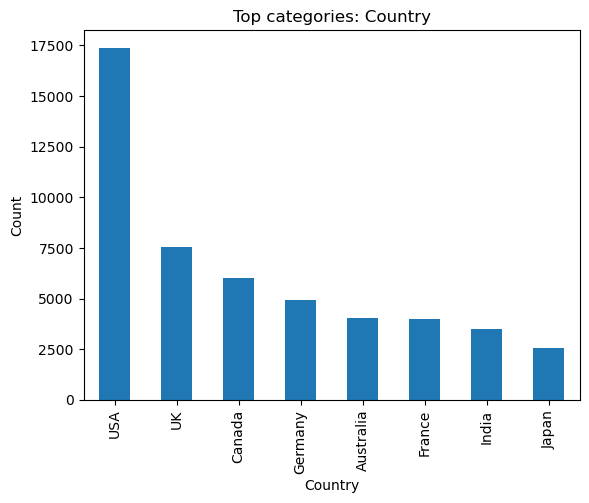

In [10]:
# show top categories for 2 categorical columns (if exist)
for col in cat_cols[:2]:
    plt.figure()
    df[col].value_counts().head(15).plot(kind="bar")
    plt.title(f"Top categories: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


### 2.3.2 Understanding relationship between variables

In [ ]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [ ]:
## Clean data

## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model


# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection